**Singular Behaviour N = 2**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
T = 10000     #Number of conformations
N = 2         #Number of monomers
b = 3         #Bond length

#Reading the generated .xyz file for corresponding parameter values
x,y,z = np.zeros([T,N+1]),np.zeros([T,N+1]),np.zeros([T,N+1])
with open(f'simulation_FJC_b=3.0_N=2_T=10000.xyz','r') as f:
    for t in range(T):
        line1 = f.readline()
        line2 = f.readline()
        for i in range(N+1):
            data = f.readline()
            values = data.split( )
            x[t,i] = float(values[1])
            y[t,i] = float(values[2])
            z[t,i] = float(values[3])

#Finding Q**2  (Q = end-to-end distance)
Q2 = []
for i in range(T):
    Q2.append((x[i,-1]-x[i,0])**2 + (y[i,-1]-y[i,0])**2 + (z[i,-1]-z[i,0])**2)

#Finding the probability of the distribution as the function of end-to-end distance
Prob_Q = []
Q = [np.sqrt(Q2[i]) for i in range(len(Q2))]
for q in Q:
    P = q/(2*b*b)
    Prob_Q.append(P)
Q_hist, bin_edges = np.histogram(Q,bins=50)

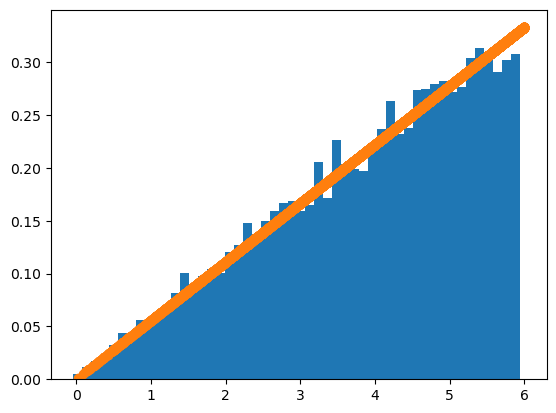

In [3]:
plt.bar(bin_edges[:-1], Q_hist/T/np.diff(bin_edges), width=np.diff(bin_edges))  #Plotting the histogram of probabilities
plt.scatter(Q,Prob_Q)                                                           #Plotting the envelope of the probability curve

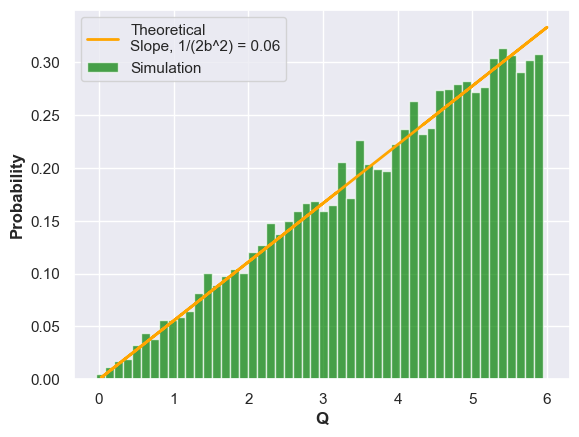

In [4]:
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
# Perform linear regression
model = LinearRegression()
model.fit(np.array(Q).reshape(-1, 1), np.array(Prob_Q).reshape(-1, 1))

plt.bar(bin_edges[:-1], Q_hist/T/np.diff(bin_edges), width=np.diff(bin_edges), color='green', alpha=0.7, label='Simulation')

plt.plot(np.array(Q).reshape(-1, 1), model.predict(np.array(Q).reshape(-1, 1)), 'orange', label=f'Theoretical\nSlope, 1/(2b^2) = {model.coef_[0][0]:.2f}', linewidth=2)

plt.xlabel('Q', fontweight='bold')
plt.ylabel('Probability', fontweight='bold')
plt.legend()
plt.grid(True)

plt.show()


In [5]:
b = np.sqrt(1/(0.2*0.6))
b

2.886751345948129